# MARKET SEGMENATION BY CLUSTERING

In this notebook, we try to segment customers into different categories based on their purchasing behaviour. Conclusions from customer segmentation can give us bussiness insights and strategies.

##### Topics explored in the notebook

1) Importing required libraries and data<br>
2) Simple visualization of the data and few  samples<br>
3) Visualisation via pca and pairplot<br>
4) Checking for dependent variables<br>
5) Outlier detection and handling<br>
6) Cluster analysis: Are there clusters, how many?<br>
7) Clustering and interpretation<br>
8) Deriving conclusions

### 1) Importing required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
%matplotlib inline

In [2]:
import itertools

In [4]:
data = pd.read_csv('D:\\USB Drive\order_segmentation_0.0_raw.csv')
data.shape

(28101, 15)

In [5]:
data.shape
data.tail(10)

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
28091       29984     10230  29984           31      15.93        4    14   
28092       29985     10230  29985           13       4.94        1    23   
28093       29986     10230  29986           12       5.00        3    14   
28094       29987     10230  29987           27       9.83        3    14   
28095       29988     10231  29988            8       0.52        4     9   
28096       29989     10231  29989           15       7.70        1     0   
28097       29990     10231  29990           22       8.97        7    12   
28098       29991     10231  29991           15       3.92        5    11   
28099       29997     10237  29997           54       0.00        4    17   
28100       29998     10237  29998           10       0.00        5    10   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
28091  11.65   11.07    23.11  27.17     0.00      0.0  26.99    0.0  
28092  13.33    0.00    13.99   4.90     6.39      0.0  61.39    0.0  
28093  14.37    0.00    11.84   3.92     2.38      0.0  67.49    0.0  
28094  14.82    0.00    14.27  44.97     0.00      0.0  25.93    0.0  
28095  28.21    0.00    48.34  23.44     0.00      0.0   0.00    0.0  
28096  61.32    0.00    23.34  15.34     0.00      0.0   0.00    0.0  
28097  29.74   28.72    19.52  22.02     0.00      0.0   0.00    0.0  
28098  23.38   35.70    40.92   0.00     0.00      0.0   0.00    0.0  
28099   9.25    0.00    77.48  13.27     0.00      0.0   0.00    0.0  
28100   0.00    0.00   100.00   0.00     0.00      0.0   0.00    0.0

### 2) Simple visualization

In [6]:
data.describe()


Unnamed: 0      customer         order   total_items     discount%  \
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000   
mean   14833.211345   4956.276147  14833.211345     33.368243      8.652148   
std     8616.515980   2873.114004   8616.515980     18.852646     14.368890   
min        0.000000      0.000000      0.000000      6.000000    -65.150000   
25%     7358.000000   2469.000000   7358.000000     21.000000      1.460000   
50%    14747.000000   4941.000000  14747.000000     30.000000      4.370000   
75%    22303.000000   7421.000000  22303.000000     42.000000     10.170000   
max    29998.000000  10237.000000  29998.000000    140.000000    100.000000   

            weekday          hour         Food%        Fresh%       Drinks%  \
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000   
mean       3.657023     15.097078     24.538509     21.186311     24.296078   
std        2.121844      5.726237     21.085909     23.520618     21.924842   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     11.000000      9.450000      0.000000      8.410000   
50%        3.000000     15.000000     20.780000     13.380000     19.020000   
75%        6.000000     20.000000     34.020000     37.080000     34.090000   
max        7.000000     23.000000    100.000000    100.000000    100.000000   

              Home%       Beauty%       Health%         Baby%         Pets%  
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000  
mean      13.946777      4.997849      1.141394      8.742325      1.029049  
std       17.304589      9.983512      5.044288     20.160893      5.803979  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        8.160000      0.000000      0.000000      0.000000      0.000000  
75%       20.670000      6.570000      0.000000      2.420000      0.000000  
max      100.000000    100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id. <br>
2. order is the unique order id. <br>
3. total_items is the number of products bought in the order. <br>
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee. <br>
5. weekday is the day of the week in which the order was placed.<br>
6. hour is the time in which the order is placed. <br>
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee  powder, oats etc.<br>
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.<br>
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.<br>
10. Home% is the percentage of money spent in home accessories.<br>
11. Beauty% is the percentage of amount spent in beauty products<br>
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.<br>
13. Baby% is the percentage spent in baby products.<br>
14. Pets% is the percentage spent in pet products like pedigree.

In [7]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
22336       23632      7807  23632           11     -65.15        1    10   
4358         4554      1487   4554            9     -63.64        7    13   
6854         7185      2418   7185            9     -47.26        5     8   
734           768       199    768           14     -39.84        6     8   
15261       16098      5379  16098            8     -26.15        3    13   
...           ...       ...    ...          ...        ...      ...   ...   
4836         5060      1696   5060           26      -0.34        4    11   
17039       17998      6038  17998           22      -0.33        2    23   
12898       13526      4557  13526           77      -0.19        4    12   
19520       20654      6889  20654           44      -0.04        4     0   
7846         8247      2875   8247           35      -0.03        6     9   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
22336   0.00    0.00    86.97  13.03     0.00     0.00   0.00    0.0  
4358    0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
6854    0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
734    28.97    0.00    71.03   0.00     0.00     0.00   0.00    0.0  
15261   0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
...      ...     ...      ...    ...      ...      ...    ...    ...  
4836   24.60    0.00    34.11  32.87     8.42     0.00   0.00    0.0  
17039   4.74    0.00    15.49   0.00     0.00     0.00  79.77    0.0  
12898  78.57    0.00    14.69   6.74     0.00     0.00   0.00    0.0  
19520  33.87    0.00    14.96  17.42    15.40    18.36   0.00    0.0  
7846   34.31   32.01     5.33   8.90     8.66     6.45   4.34    0.0  

[124 rows x 15 columns]

-> drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

#### Selecting samples

In [8]:
indices = [56,2459,908,23632,1804,219,592,349]
data.iloc[indices, :]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
56             62         4     62           37       1.75        7    21   
2459         2556       777   2556           23       4.23        2    22   
908           945       252    945           21       0.54        3     3   
23632       24991      8252  24991           47       9.34        3    14   
1804         1874       555   1874           18      28.06        1     9   
219           230        48    230           41      20.07        1    10   
592           622       158    622           28       2.08        5    11   
349           364        74    364           34      10.97        2    22   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56     19.32   66.91    12.30   1.46     0.00      0.0   0.00   0.00  
2459   18.15    9.12     8.43  19.14     0.00      0.0  45.16   0.00  
908    19.69   29.17    42.31   8.84     0.00      0.0   0.00   0.00  
23632   6.22    0.00    93.78   0.00     0.00      0.0   0.00   0.00  
1804   40.34    0.00     0.00  55.15     4.51      0.0   0.00   0.00  
219    21.15   47.17    13.17   0.00    18.52      0.0   0.00   0.00  
592    21.41    0.00    21.76   8.53     5.68      0.0   0.00  42.61  
349    53.67   23.32    10.24  12.77     0.00      0.0   0.00   0.00

-> 56 order seems to depend on ulabox for grocery, fresh food and drinks. <br>
-> 2459 and 908 order seems to depend on ulabox for everything, probably most valuable customers. <br>
-> 23632 order seems to buy a lot of drinks from ulabox in spite of the negative discount, which implies extra charges.<br>
-> 1803 buys a lot of pet products, the order must be by a pet lover. <br>
-> 218 buys a lot of home decoratory accessories. <br>
-> 592 must be a woman, who would like her beauty products, to be delivered by ulabox at her door.<br>
-> 349 seems to be parents, who newly had a baby.

There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hece let's keep it.

Let's remove customer, order and hour features from the data

In [10]:
df = data.drop(['customer', 'order', 'hour'], axis=1)

frame = data
df.shape

(28101, 12)

### 3) Visualization via pca and pairplot

Let's try and do pca of the features and see the explained variance and plots

In [11]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

In [15]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

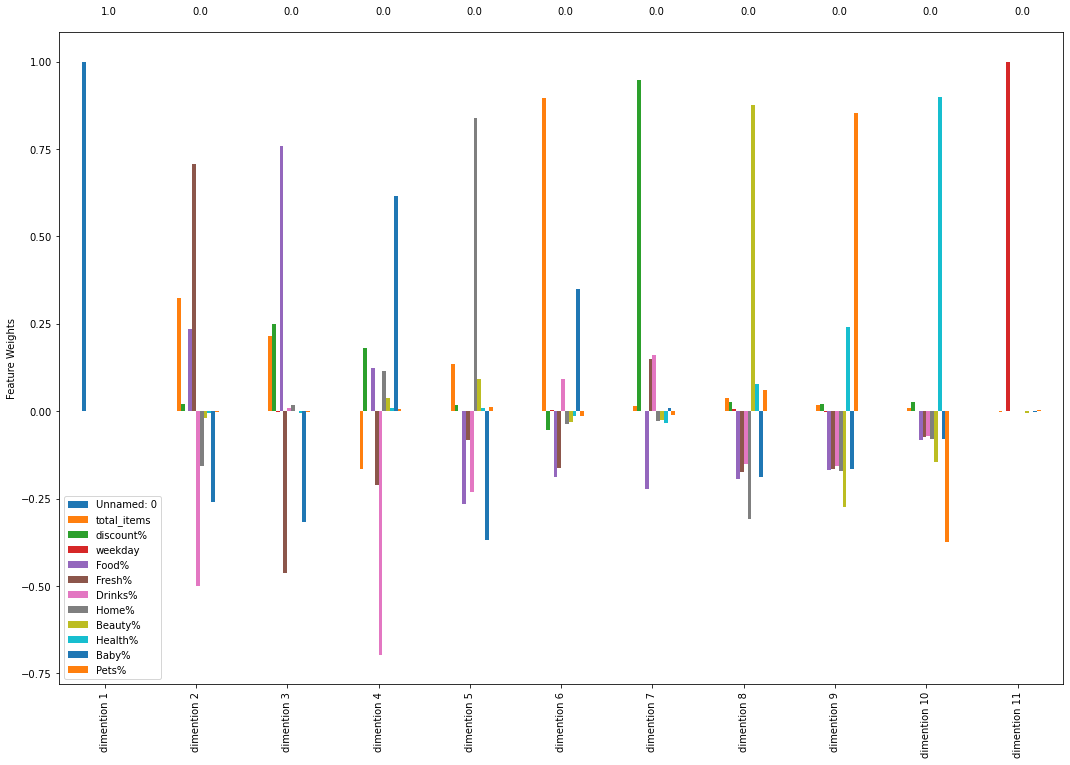

In [16]:
pca_results(pca, df)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

In [17]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

C:\Users\shami\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

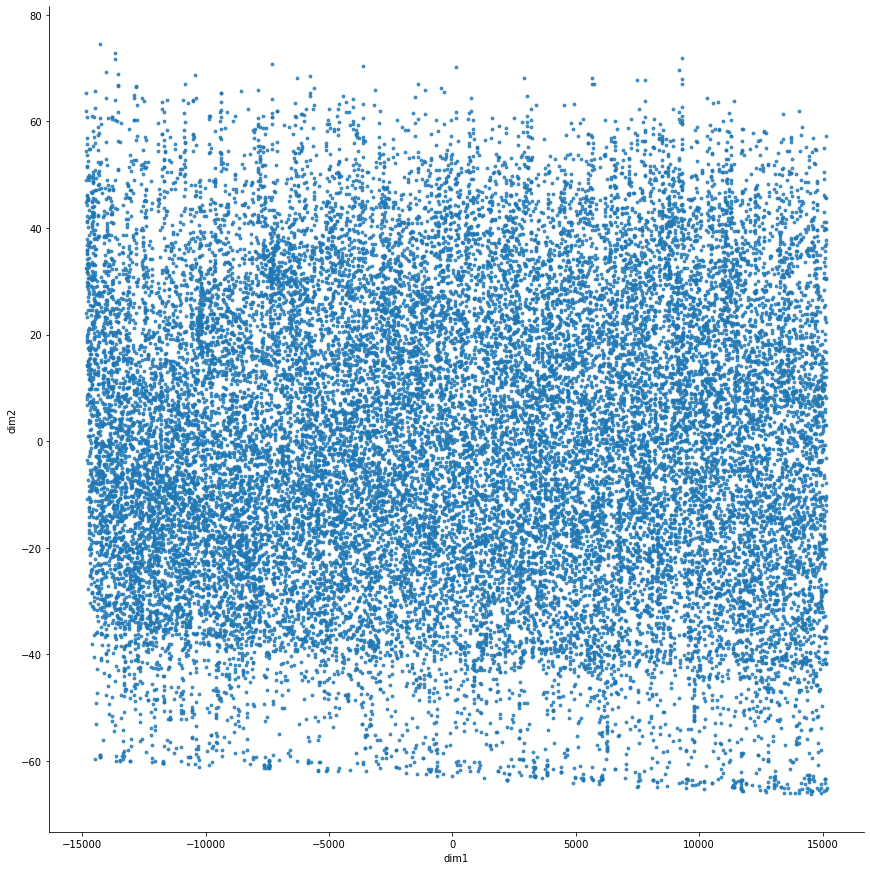

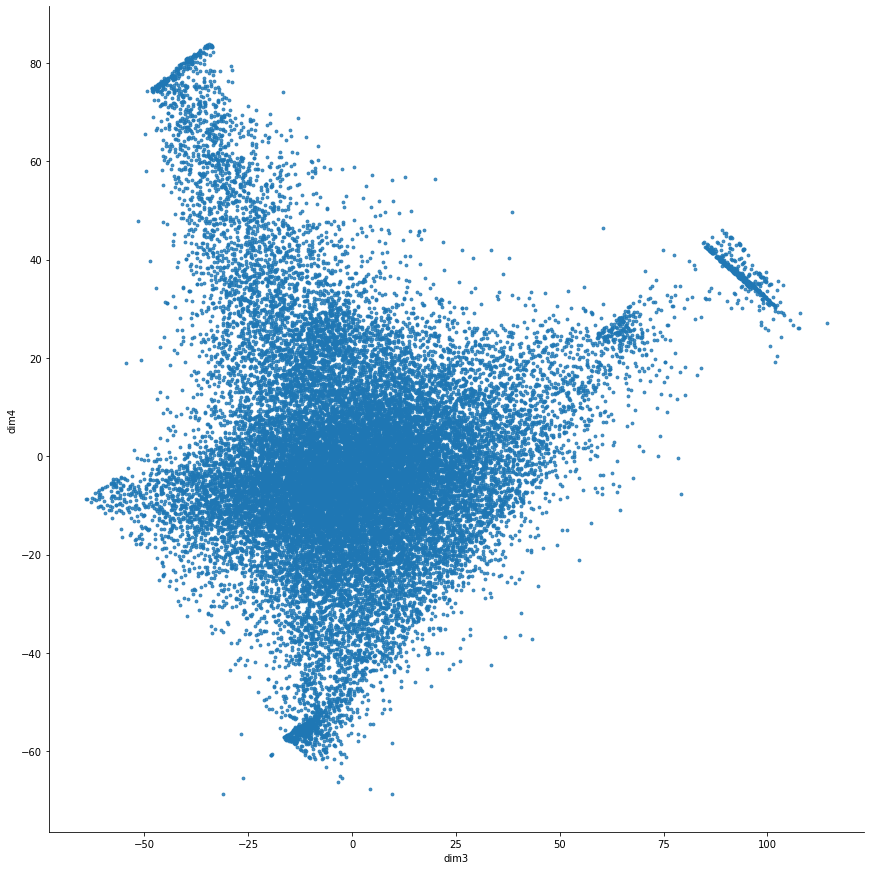

In [40]:
pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 1440x1440 with 0 Axes>

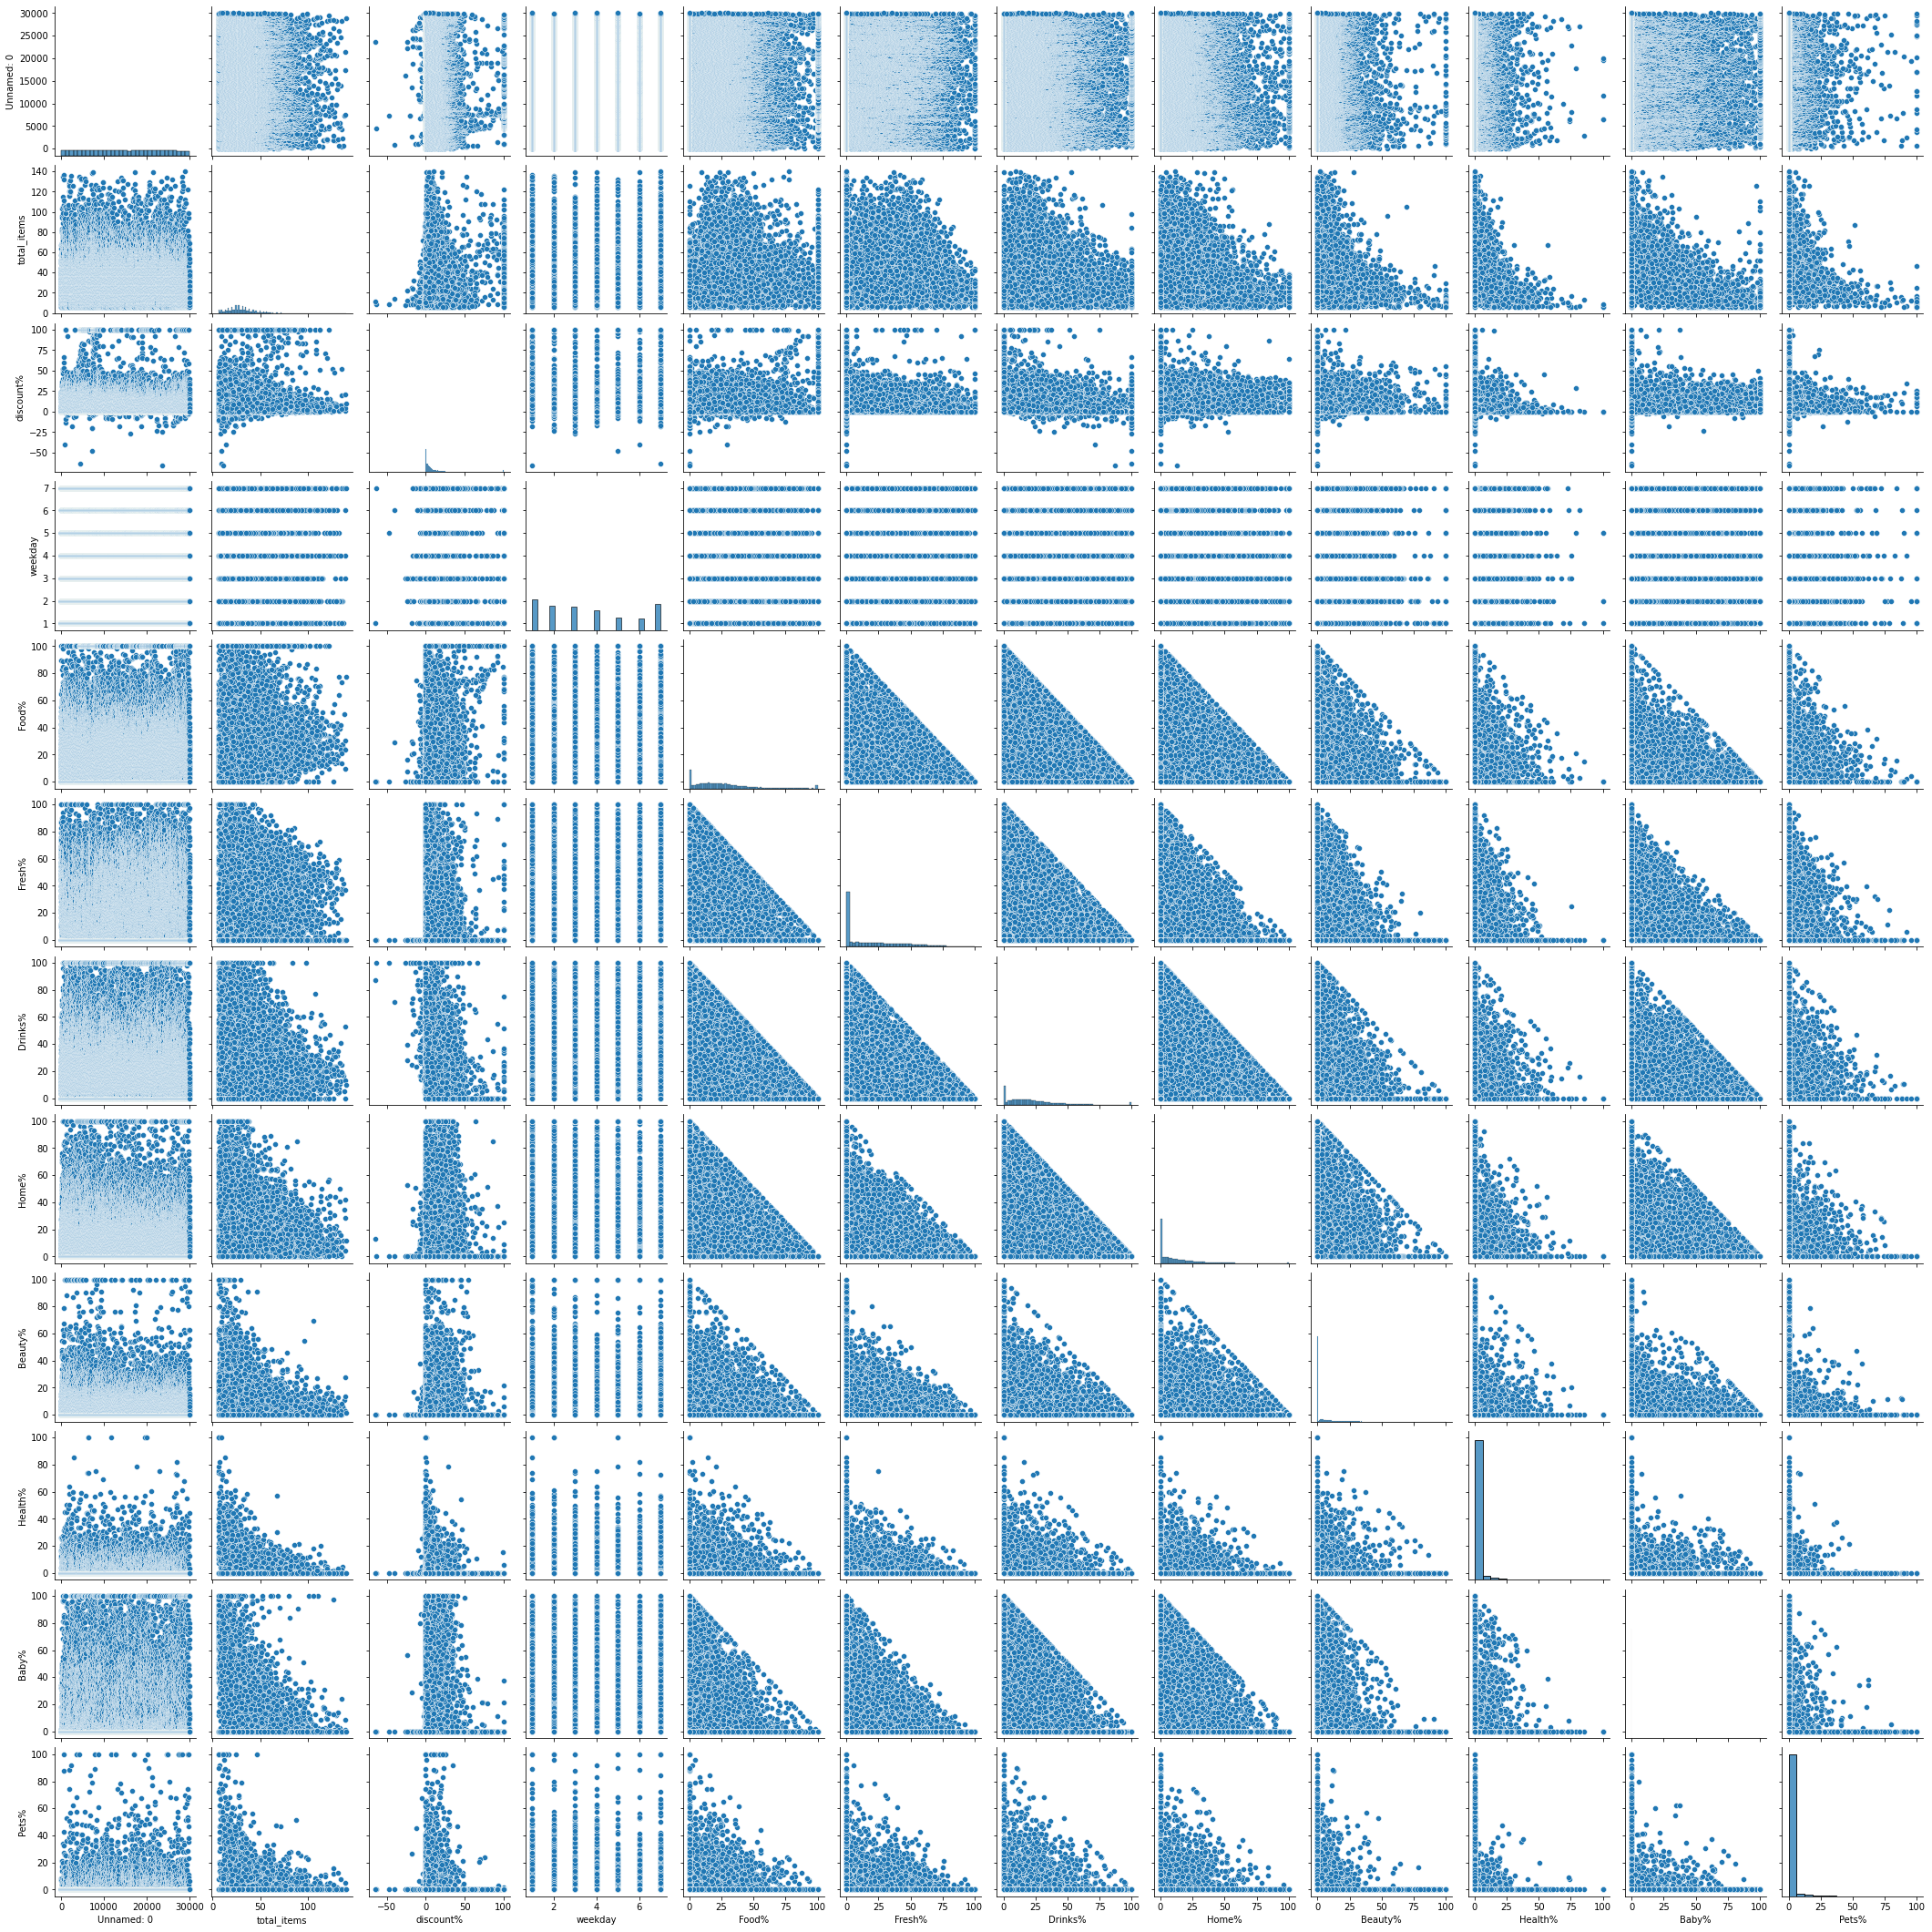

In [18]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

-> total_items is skewed, applying a log transformation will help the clustering.<br>
-> when discount% increases total_items icreases which makes sense, people will buy more on discount.<br>
-> below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.<br>
-> it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.<br>
-> the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

### 4) Checking Dependant Variables

This function takes the data frame as arguement and prints R2 score of model trained with each feature as target. This is a good method to identify the dependant variables from our dataset. This can be used in other contexts as well.

In [20]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [21]:
dependant_variable_detector(df)

Using Unnamed: 0 as dependent variable R2 score is :0.02723400077473015
Using total_items as dependent variable R2 score is :0.11320782330387147
Using discount% as dependent variable R2 score is :0.15080818681855424
Using weekday as dependent variable R2 score is :0.0024083464347569583
Using Food% as dependent variable R2 score is :0.994301287104727
Using Fresh% as dependent variable R2 score is :0.9954136584971575
Using Drinks% as dependent variable R2 score is :0.9947304025191194
Using Home% as dependent variable R2 score is :0.9915420105091306
Using Beauty% as dependent variable R2 score is :0.9751744086774796
Using Health% as dependent variable R2 score is :0.908831114333335
Using Baby% as dependent variable R2 score is :0.9937800026062763
Using Pets% as dependent variable R2 score is :0.9295341248537597


In [22]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

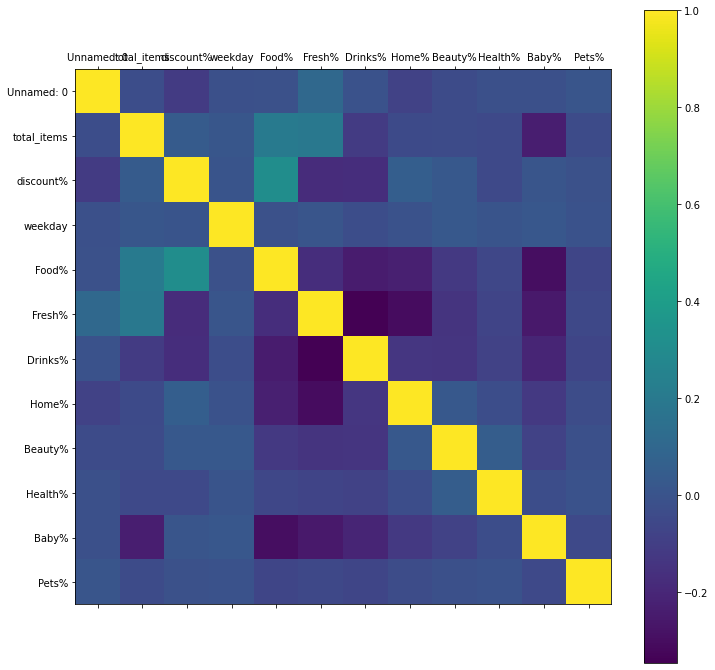

In [23]:
plot_corr_matrix(df)

-> The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.<br>
-> The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.

### 5) Outlier detection

C:\Users\shami\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


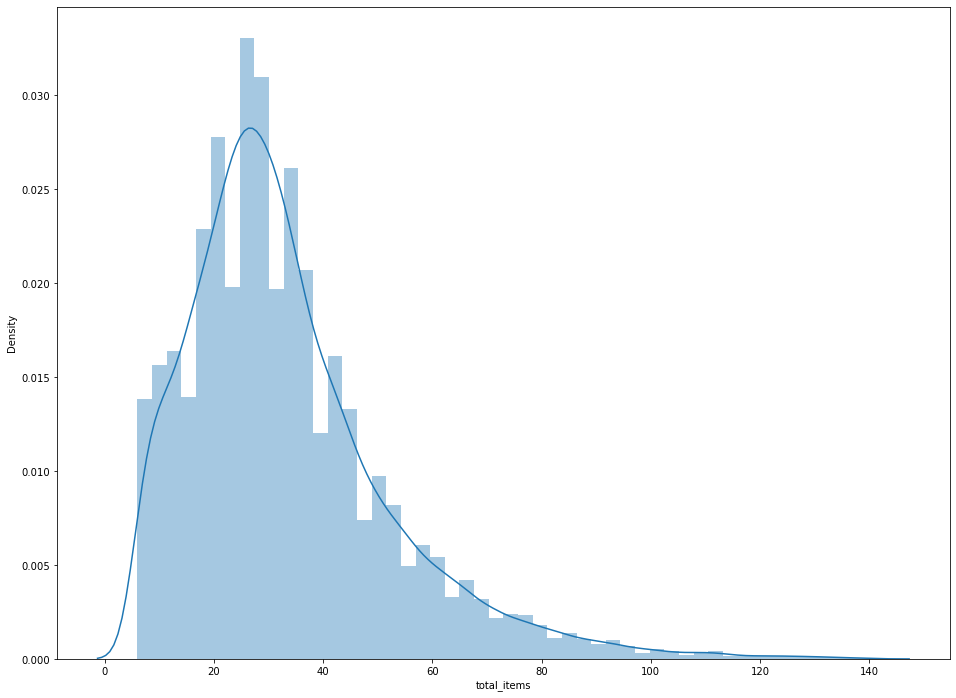

In [24]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

C:\Users\shami\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


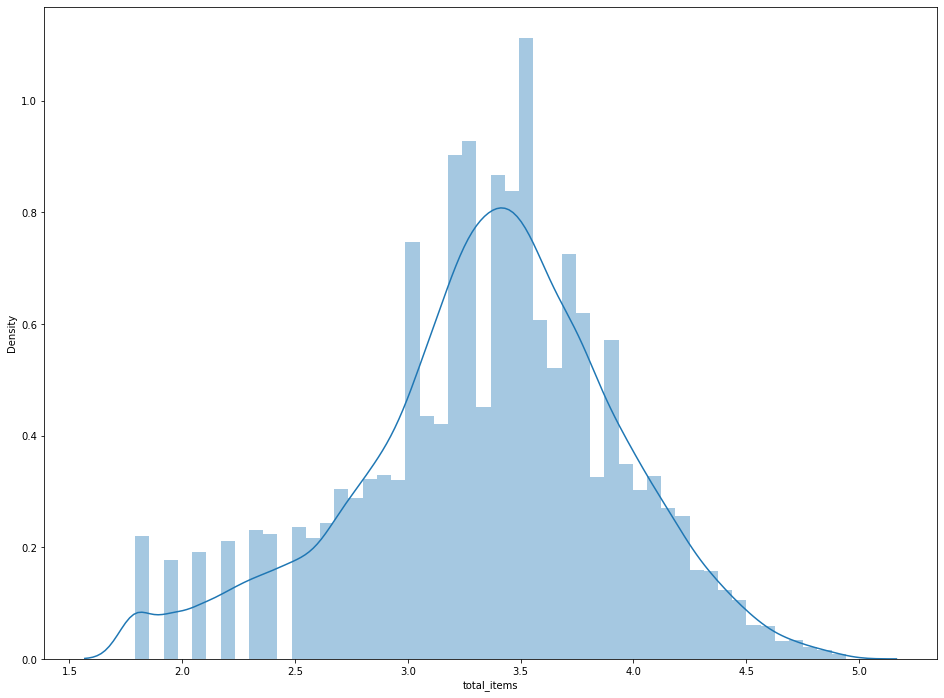

In [25]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

That's better

#### Turkey Outlier Detection

-> According to Turkey method a point is an outlier if it lies 1.5 times inter quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.<br>
-> For more info refer: https://en.wikipedia.org/wiki/Outlier

This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [26]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [28]:
outlier_indices = turkey_outlier_detector(df)

_________________________
Unnamed: 0-------->0
_________________________
total_items-------->775
_________________________
discount%-------->2147
_________________________
weekday-------->0
_________________________
Food%-------->1150
_________________________
Fresh%-------->137
_________________________
Drinks%-------->1255
_________________________
Home%-------->1194
_________________________
Beauty%-------->2472
_________________________
Health%-------->28101
_________________________
Baby%-------->6190
_________________________
Pets%-------->28101


-> The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.<br>
-> The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenerio.<br>
-> The outliers in discount% is also due to 0% and 100% entries.<br>
-> For these features let's acknoledge the fact that there are outliers and leave it there.<br>
-> Let's remove the outliers in total_items.

In [29]:
df.drop(outlier_indices['total_items'], inplace=True)
df.shape

(27326, 12)

In [30]:
frame.drop(outlier_indices['total_items'], inplace=True)
frame.shape

(27326, 15)

## 6) Are there clusters in the data, how many clusters?

#### Elbow Method

-> The first method we are going to try is the elbow method.<br>
-> In this method we plot the sum of distances of all the data points to the correspoding cluster centeroids vs number of clusters, for a range of number of clusters.<br>
-> If there is a elbow in the plot the point at which elbow occured is the number of clusters present in the data.<br>
-> We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.<br>

In [32]:
from sklearn.cluster import KMeans

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X = scaler.fit_transform(df.values)

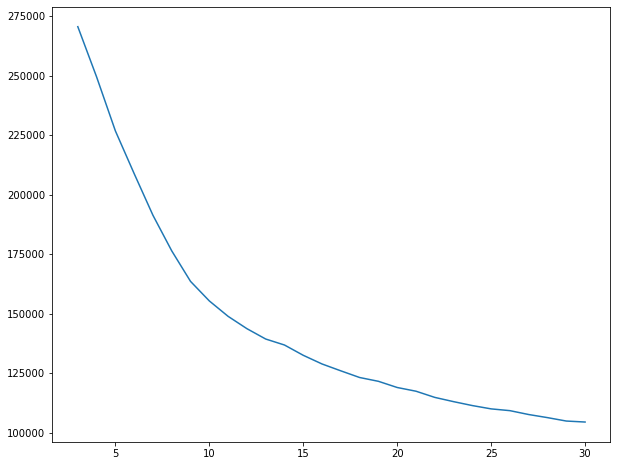

In [35]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

We got lucky! There is somewhere around 10 clusters in the data.

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistic score is bad. Let's proceed with the analysis..

#### Silhoutte Score

-> a(i) is the sum of the sum of distances of the ith data point to the other data points in it's cluster.<br>
-> Calculate the sum of distance of ith data point to the points in every other cluster.<br>
-> b(i) is the sum of distances from ith data point to all points in a cluster, for which sum of distances is munimum.<br>
-> silhoutte score, s(i) = 1-a(i)/b(i)<br>
-> If a data point is more similar to it's own cluster and very much different from other clusters, then 
a(i)<<b(i), greater will be the silhoutte score.<br>
-> The silhoutte score we plot is the average of it over all the data points.<br>

In [37]:
def plot_silhoutte_score(X, max_clusters=15):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

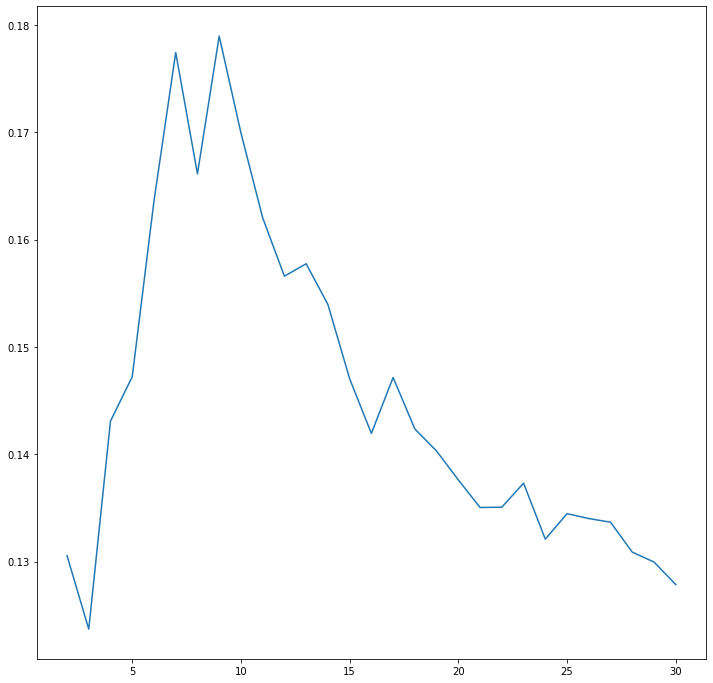

In [38]:
plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

This is same as the elbow we saw before.

This again gives us a surety that, there are around 10 clusters.

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### 7) Clustering and interpretation

In [40]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)


In [41]:
frame[frame['labels']==0]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
88             96         8     96           32      24.44        4    22   
130           140        18    140           16      21.57        4    13   
154           164        27    164           15       8.69        7    11   
155           165        27    165           23       0.00        7    12   
174           184        33    184           28       4.09        3    15   
...           ...       ...    ...          ...        ...      ...   ...   
28072       29958     10215  29958           15       3.18        1    13   
28095       29988     10231  29988            8       0.52        4     9   
28098       29991     10231  29991           15       3.92        5    11   
28099       29997     10237  29997           54       0.00        4    17   
28100       29998     10237  29998           10       0.00        5    10   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  
88      7.18   33.83    53.07   5.92     0.00      0.0   0.00    0.0       0  
130     1.69   36.07    62.24   0.00     0.00      0.0   0.00    0.0       0  
154    31.68    0.00    61.41   2.76     4.15      0.0   0.00    0.0       0  
155    25.35    6.84    61.86   5.95     0.00      0.0   0.00    0.0       0  
174    15.20   19.15    40.01   9.16    12.07      0.0   4.41    0.0       0  
...      ...     ...      ...    ...      ...      ...    ...    ...     ...  
28072   6.47   20.15    51.74  10.27     0.00      0.0  11.37    0.0       0  
28095  28.21    0.00    48.34  23.44     0.00      0.0   0.00    0.0       0  
28098  23.38   35.70    40.92   0.00     0.00      0.0   0.00    0.0       0  
28099   9.25    0.00    77.48  13.27     0.00      0.0   0.00    0.0       0  
28100   0.00    0.00   100.00   0.00     0.00      0.0   0.00    0.0       0  

[3293 rows x 16 columns]

In [42]:
frame[frame['labels']==0].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   3293.000000   3293.000000   3293.000000  3293.000000  3293.000000   
mean   15108.215002   5045.125418  15108.215002    24.117218     5.579681   
std     8707.047450   2905.193557   8707.047450    11.382139     7.843377   
min       96.000000      8.000000     96.000000     8.000000   -65.150000   
25%     7121.000000   2405.000000   7121.000000    16.000000     0.730000   
50%    15364.000000   5164.000000  15364.000000    22.000000     3.530000   
75%    22821.000000   7578.000000  22821.000000    30.000000     7.620000   
max    29998.000000  10237.000000  29998.000000    98.000000    66.140000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  3293.000000  3293.000000  3293.000000  3293.000000  3293.000000   
mean      3.387792    14.656241    12.936341     6.242375    67.973195   
std       1.886657     5.469924    11.858657    10.137247    17.787703   
min       1.000000     0.000000     0.000000     0.000000    19.490000   
25%       2.000000    11.000000     0.000000     0.000000    54.060000   
50%       3.000000    15.000000    11.320000     0.000000    64.280000   
75%       5.000000    19.000000    20.930000    10.100000    80.430000   
max       7.000000    23.000000    57.870000    55.650000   100.000000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  3293.000000  3293.000000  3293.000000  3293.000000  3293.000000  3293.0  
mean      8.222065     2.066608     0.228123     1.911728     0.230701     0.0  
std      10.111577     4.572933     1.402690     6.420435     1.590159     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.0  
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.0  
50%       3.860000     0.000000     0.000000     0.000000     0.000000     0.0  
75%      14.510000     0.000000     0.000000     0.000000     0.000000     0.0  
max      42.660000    27.430000    16.720000    42.690000    18.510000     0.0

-> These class of people seem to order beauty products a lot.<br>
-> They must be beauty concious people, let's call them beauty concious.

In [43]:
frame.loc[frame['labels']==0, 'class'] = 'drinkers'

In [62]:
frame[frame['labels']==1]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
20             20         1     20           30      17.89        2    11   
32             33         3     33           36      15.02        1    12   
68             76         5     76           21      11.76        2    23   
104           114        11    114           57      20.50        2    17   
105           115        11    115           24      16.27        4    21   
...           ...       ...    ...          ...        ...      ...   ...   
28067       29953     10213  29953            8      35.10        4     0   
28071       29957     10215  29957           28       7.14        4    15   
28086       29976     10225  29976            8       3.06        4    12   
28092       29985     10230  29985           13       4.94        1    23   
28093       29986     10230  29986           12       5.00        3    14   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  labels  \
20     14.62   32.77    18.71   0.00     0.00      0.0   33.90    0.0       1   
32     27.55   22.82     5.96   0.00     0.00      0.0   43.67    0.0       1   
68      6.84    0.00    24.02  26.87    10.21      0.0   32.06    0.0       1   
104    31.74    4.87     2.28  10.10     7.61      0.0   43.40    0.0       1   
105    17.02    3.77     3.12   0.00     0.00      0.0   76.10    0.0       1   
...      ...     ...      ...    ...      ...      ...     ...    ...     ...   
28067   0.00    0.00     0.00   0.00     0.00      0.0  100.00    0.0       1   
28071  33.14   13.10     8.63   3.42     0.00      0.0   41.71    0.0       1   
28086   0.00    0.00     0.00   0.00     0.00      0.0  100.00    0.0       1   
28092  13.33    0.00    13.99   4.90     6.39      0.0   61.39    0.0       1   
28093  14.37    0.00    11.84   3.92     2.38      0.0   67.49    0.0       1   

      class  
20      NaN  
32      NaN  
68      NaN  
104     NaN  
105     NaN  
...     ...  
28067   NaN  
28071   NaN  
28086   NaN  
28092   NaN  
28093   NaN  

[2503 rows x 17 columns]

In [44]:
frame[frame['labels']==1].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   6019.000000   6019.000000   6019.000000  6019.000000  6019.000000   
mean   16866.341419   5631.579997  16866.341419    38.302708     5.236307   
std     8235.924206   2736.378117   8235.924206    17.629512     6.589619   
min        0.000000      0.000000      0.000000     8.000000     0.000000   
25%    10642.000000   3635.000000  10642.000000    26.000000     1.020000   
50%    17733.000000   5949.000000  17733.000000    34.000000     3.040000   
75%    23894.500000   7906.500000  23894.500000    47.000000     6.800000   
max    29981.000000  10228.000000  29981.000000   117.000000    65.100000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  6019.000000  6019.000000  6019.000000  6019.000000  6019.000000   
mean      3.004818    14.993354    18.664549    55.786141    13.491374   
std       1.747945     5.900777    10.677818    15.595836    10.373090   
min       1.000000     0.000000     0.000000    20.780000     0.000000   
25%       1.000000    11.000000    10.830000    43.890000     5.680000   
50%       3.000000    15.000000    17.950000    54.030000    11.810000   
75%       4.000000    20.000000    25.745000    66.010000    19.580000   
max       7.000000    23.000000    55.570000   100.000000    53.740000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  6019.000000  6019.000000  6019.000000  6019.000000  6019.000000  6019.0  
mean      6.401308     2.632696     0.446129     2.051897     0.456488     1.0  
std       7.606402     4.467646     1.853645     6.206450     2.070803     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     1.0  
25%       0.000000     0.000000     0.000000     0.000000     0.000000     1.0  
50%       3.780000     0.000000     0.000000     0.000000     0.000000     1.0  
75%      10.175000     3.955000     0.000000     0.000000     0.000000     1.0  
max      44.100000    23.960000    14.460000    43.480000    19.650000     1.0

-> These are the class of people who have ordered drinks a lot.<br>
-> These people had to face a lot of extra charges for drink purchases.<br>
-> They are potential customers, as we all know drinks can be addictive atleast in a teeny tiny level.

In [45]:
frame.loc[frame['labels']==1, 'class'] = 'loyal_fresh'

In [ ]:
frame[frame['labels']==2]

In [46]:
frame[frame['labels']==2].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    493.000000    493.000000    493.000000   493.000000  493.000000   
mean    9433.427992   3174.468560   9433.427992    46.839757   94.273834   
std     6583.426747   2200.901321   6583.426747    23.380136   13.393317   
min      435.000000    100.000000    435.000000     8.000000   42.080000   
25%     4909.000000   1645.000000   4909.000000    28.000000  100.000000   
50%     7529.000000   2561.000000   7529.000000    46.000000  100.000000   
75%     9764.000000   3400.000000   9764.000000    63.000000  100.000000   
max    29770.000000  10129.000000  29770.000000   118.000000  100.000000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  493.000000  493.000000  493.000000  493.000000  493.000000  493.000000   
mean     3.622718   15.292089   94.004199    1.918276    2.182698    0.850264   
std      2.027166    4.918015   17.071847    9.926980    7.619598    4.403973   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   12.000000  100.000000    0.000000    0.000000    0.000000   
50%      3.000000   15.000000  100.000000    0.000000    0.000000    0.000000   
75%      5.000000   19.000000  100.000000    0.000000    0.000000    0.000000   
max      7.000000   23.000000  100.000000  100.000000   75.020000   37.410000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  493.000000  493.000000  493.000000  493.000000   493.0  
mean     0.451116    0.084990    0.382901    0.104320     2.0  
std      2.642102    0.988327    3.017350    1.496875     0.0  
min      0.000000    0.000000    0.000000    0.000000     2.0  
25%      0.000000    0.000000    0.000000    0.000000     2.0  
50%      0.000000    0.000000    0.000000    0.000000     2.0  
75%      0.000000    0.000000    0.000000    0.000000     2.0  
max     33.070000   15.420000   37.220000   24.080000     2.0

-> These are again very loyal customers who depend on ulabox for a lot of things.<br>
-> They tend to buy grocery a little more, let's call them loyals grocery.

In [47]:
frame.loc[frame['labels']==2, 'class'] = 'grocers'


In [ ]:
frame[frame['labels']==3]

In [48]:
frame[frame['labels']==3].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   4700.000000   4700.000000   4700.000000  4700.000000  4700.000000   
mean   14136.736170   4724.932553  14136.736170    42.976809     6.456149   
std     8291.924005   2764.837640   8291.924005    18.722208     6.838755   
min       23.000000      2.000000     23.000000     8.000000    -8.070000   
25%     7123.000000   2406.500000   7123.000000    30.000000     1.840000   
50%    13582.000000   4570.500000  13582.000000    38.000000     4.370000   
75%    20941.250000   6998.750000  20941.250000    52.000000     8.610000   
max    29990.000000  10231.000000  29990.000000   118.000000    60.020000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  4700.000000  4700.000000  4700.000000  4700.000000  4700.000000   
mean      6.228511    16.012979    28.397715    23.996940    23.323096   
std       1.044914     5.558339    13.704614    16.758435    13.238829   
min       3.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    12.000000    18.600000     9.930000    13.090000   
50%       7.000000    17.000000    27.210000    23.900000    21.640000   
75%       7.000000    21.000000    36.700000    36.402500    32.480000   
max       7.000000    23.000000    82.180000    69.520000    77.040000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  4700.000000  4700.000000  4700.000000  4700.000000  4700.000000  4700.0  
mean     13.632170     4.871366     0.597111     4.532474     0.522560     3.0  
std      10.900542     6.017688     2.106759     9.480338     2.261832     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     3.0  
25%       4.490000     0.000000     0.000000     0.000000     0.000000     3.0  
50%      11.590000     2.465000     0.000000     0.000000     0.000000     3.0  
75%      21.415000     8.370000     0.000000     2.440000     0.000000     3.0  
max      47.980000    27.180000    14.120000    45.250000    19.010000     3.0

-> These customers buy all kinds of products from ulabox, fresh, drinks and food dominnantly.<br>
-> These are the loyal customers of ulabox who depends on ulabox for everything. <br>
-> Let's call them loyals. <br>

In [49]:
frame.loc[frame['labels']==3, 'class'] = 'loyals'

In [ ]:
frame[frame['labels']==4]

In [50]:
frame[frame['labels']==4].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   2753.000000   2753.000000   2753.000000  2753.000000  2753.000000   
mean   12567.939702   4201.695605  12567.939702    27.181983    12.623062   
std     8521.387644   2851.649361   8521.387644    13.456268    10.283409   
min       69.000000      4.000000     69.000000     8.000000   -23.980000   
25%     5166.000000   1738.000000   5166.000000    18.000000     4.550000   
50%    11265.000000   3800.000000  11265.000000    25.000000    11.030000   
75%    19161.000000   6427.000000  19161.000000    33.000000    18.360000   
max    29987.000000  10230.000000  29987.000000   114.000000    86.090000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  2753.000000  2753.000000  2753.000000  2753.000000  2753.000000   
mean      3.340719    14.799491    14.005768     5.893683    19.791511   
std       1.993303     5.556702    12.097813    10.162388    14.766523   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     3.180000     0.000000     7.290000   
50%       3.000000    15.000000    12.470000     0.000000    18.750000   
75%       5.000000    20.000000    21.770000     8.560000    31.250000   
max       7.000000    23.000000    62.680000    61.540000    59.910000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  2753.000000  2753.000000  2753.000000  2753.000000  2753.000000  2753.0  
mean     51.831032     4.331021     0.441420     3.286295     0.323672     4.0  
std      17.426998     6.266123     1.899946     8.282706     1.916681     0.0  
min      17.350000     0.000000     0.000000     0.000000     0.000000     4.0  
25%      39.250000     0.000000     0.000000     0.000000     0.000000     4.0  
50%      47.610000     0.000000     0.000000     0.000000     0.000000     4.0  
75%      59.370000     7.540000     0.000000     0.000000     0.000000     4.0  
max     100.000000    32.950000    15.230000    47.460000    20.440000     4.0

-> This should be the class of orders that buy a lot of home utility products like floor cleaner, curtains, washing powder etc.<br>
-> Let's call this people home decorators.

In [51]:
frame.loc[frame['labels']==4, 'class'] = 'home owners'

In [ ]:
frame[frame['labels']==5]

In [52]:
frame[frame['labels']==5].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    458.000000    458.000000    458.000000   458.000000  458.000000   
mean   15111.895197   5059.958515  15111.895197    27.082969    8.121201   
std     8293.143764   2768.331456   8293.143764    14.950308    8.951914   
min      162.000000     26.000000    162.000000     8.000000  -18.060000   
25%     8295.500000   2885.000000   8295.500000    17.000000    1.595000   
50%    16078.500000   5376.500000  16078.500000    24.000000    5.595000   
75%    21965.000000   7319.500000  21965.000000    33.000000   12.020000   
max    29906.000000  10198.000000  29906.000000   100.000000   68.140000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  458.000000  458.000000  458.000000  458.000000  458.000000  458.000000   
mean     3.500000   14.792576   15.850197   12.187838   17.928210   11.757664   
std      2.093284    5.709851   13.809038   15.900187   15.996514   13.377828   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   11.000000    4.500000    0.000000    5.330000    0.000000   
50%      3.000000   15.000000   14.285000    3.630000   14.605000    7.535000   
75%      5.000000   20.000000   22.445000   21.990000   25.590000   18.005000   
max      7.000000   23.000000   72.120000   75.680000   76.180000   69.480000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  458.000000  458.000000  458.000000  458.000000   458.0  
mean     3.840983    0.529367    2.669410   35.192162     5.0  
std      7.336891    2.749919    8.987271   18.933135     0.0  
min      0.000000    0.000000    0.000000   17.230000     5.0  
25%      0.000000    0.000000    0.000000   22.180000     5.0  
50%      0.000000    0.000000    0.000000   28.340000     5.0  
75%      5.162500    0.000000    0.000000   40.787500     5.0  
max     47.250000   26.290000   74.960000  100.000000     5.0

-> This class of orders buy a lot of Food, Fresh and Drinks. With Fresh being more dominant.<br>
-> These orders might be a little valuable, as these orders cover Food%, Fresh%, Drinnks%, Home%.

In [53]:
frame.loc[frame['labels']==5, 'class'] = 'pet_owners'

In [ ]:
frame[frame['labels']==6]

In [54]:
frame[frame['labels']==6].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   1235.000000   1235.000000   1235.000000  1235.000000  1235.000000   
mean   13014.246964   4350.927126  13014.246964    27.435628    11.484721   
std     8921.119650   2985.425304   8921.119650    13.480451    11.553651   
min      107.000000      9.000000    107.000000     8.000000    -7.810000   
25%     5154.500000   1733.000000   5154.500000    18.000000     3.125000   
50%    11463.000000   3867.000000  11463.000000    25.000000     7.990000   
75%    20740.000000   6921.000000  20740.000000    33.000000    15.595000   
max    29979.000000  10227.000000  29979.000000   105.000000    61.860000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean      3.743320    15.018623    17.668421     9.635579    17.158040   
std       2.126401     5.824178    14.038590    13.452924    14.753107   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     6.075000     0.000000     5.070000   
50%       3.000000    15.000000    16.100000     0.000000    14.880000   
75%       6.000000    20.000000    26.570000    17.305000    26.165000   
max       7.000000    23.000000    70.570000    67.730000    69.630000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000  1235.0  
mean     14.070842    36.537887     0.757943     3.580785     0.359344     6.0  
std      14.089343    16.592548     2.793268     9.762814     2.060075     0.0  
min       0.000000    18.530000     0.000000     0.000000     0.000000     6.0  
25%       0.000000    25.820000     0.000000     0.000000     0.000000     6.0  
50%      10.360000    31.010000     0.000000     0.000000     0.000000     6.0  
75%      23.455000    41.700000     0.000000     0.000000     0.000000     6.0  
max      66.690000   100.000000    23.970000    63.450000    22.890000     6.0

-> These class of people have brought baby products a lot.<br>
-> They must be couple with new babies, let's call them new parents.

In [55]:
frame.loc[frame['labels']==6, 'class'] = 'beauty_conscious'

In [ ]:
frame[frame['labels']==7]

In [56]:
frame[frame['labels']==7].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   5144.000000   5144.000000   5144.000000  5144.000000  5144.000000   
mean   15241.231337   5091.009914  15241.231337    38.228227     5.988488   
std     8723.696831   2909.551763   8723.696831    18.168000     7.230262   
min       15.000000      1.000000     15.000000     8.000000   -11.990000   
25%     7911.500000   2738.000000   7911.500000    26.000000     1.450000   
50%    15508.000000   5197.500000  15508.000000    34.000000     3.740000   
75%    22651.250000   7521.000000  22651.250000    47.000000     7.742500   
max    29989.000000  10231.000000  29989.000000   113.000000    52.040000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  5144.000000  5144.000000  5144.000000  5144.000000  5144.000000   
mean      2.385303    14.917379    46.627271    11.823278    23.020896   
std       1.324057     5.738211    19.400494    12.061664    13.620206   
min       1.000000     0.000000     4.140000     0.000000     0.000000   
25%       1.000000    11.000000    32.690000     0.000000    12.787500   
50%       2.000000    15.000000    43.025000     9.180000    22.680000   
75%       3.000000    20.000000    56.075000    21.750000    32.850000   
max       7.000000    23.000000   100.000000    46.390000    61.790000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  5144.000000  5144.000000  5144.000000  5144.000000  5144.000000  5144.0  
mean     11.030039     3.613993     0.505410     2.710955     0.543941     7.0  
std      10.067162     5.376916     1.927981     7.256919     2.348853     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     7.0  
25%       0.460000     0.000000     0.000000     0.000000     0.000000     7.0  
50%       9.240000     0.000000     0.000000     0.000000     0.000000     7.0  
75%      18.427500     6.112500     0.000000     0.000000     0.000000     7.0  
max      44.670000    29.050000    14.600000    45.600000    18.920000     7.0

-> This is the class of people who had bought a lot of health products, let's call them health concious people

In [57]:
frame.loc[frame['labels']==7, 'class'] = 'loyal_food'

In [ ]:
frame[frame['labels']==8]

In [58]:
frame[frame['labels']==8].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   2499.000000   2499.000000   2499.000000  2499.000000  2499.000000   
mean   14406.362145   4816.230492  14406.362145    20.658663     8.646735   
std     8412.245898   2804.770686   8412.245898    11.154527     9.461057   
min       20.000000      1.000000     20.000000     8.000000   -23.890000   
25%     7061.500000   2386.500000   7061.500000    13.000000     1.240000   
50%    14298.000000   4799.000000  14298.000000    18.000000     4.890000   
75%    20998.500000   7024.500000  20998.500000    26.000000    13.735000   
max    29986.000000  10230.000000  29986.000000   110.000000    53.290000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  2499.000000  2499.000000  2499.000000  2499.000000  2499.000000   
mean      3.661064    15.199680     9.030252     5.479468    14.711793   
std       2.211760     6.001313     9.943051     8.891843    12.633399   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     0.000000     0.000000     3.575000   
50%       3.000000    16.000000     6.360000     0.000000    12.920000   
75%       6.000000    21.000000    14.165000     8.760000    22.700000   
max       7.000000    23.000000    63.640000    52.150000    59.370000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  2499.000000  2499.000000  2499.000000  2499.000000  2499.000000  2499.0  
mean      8.640144     2.680428     0.386595    58.718940     0.197151     8.0  
std      10.735782     5.161823     1.980402    19.106719     1.473604     0.0  
min       0.000000     0.000000     0.000000    23.140000     0.000000     8.0  
25%       0.000000     0.000000     0.000000    43.910000     0.000000     8.0  
50%       4.420000     0.000000     0.000000    54.430000     0.000000     8.0  
75%      13.885000     3.560000     0.000000    71.850000     0.000000     8.0  
max      51.150000    33.730000    18.310000   100.000000    19.290000     8.0

-> This is the class of pet lovers, that's obvious from the data we see

In [59]:
frame.loc[frame['labels']==8, 'class'] = 'new parents'

In [ ]:
frame[frame['labels']==9]

In [60]:
frame[frame['labels']==9].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    732.000000    732.000000    732.000000   732.000000  732.000000   
mean   13896.006831   4641.991803  13896.006831    27.039617    5.702104   
std     8762.085577   2926.447520   8762.085577    13.731441    8.281210   
min        3.000000      1.000000      3.000000     8.000000   -5.540000   
25%     6310.500000   2135.000000   6310.500000    18.000000    0.837500   
50%    13803.000000   4642.500000  13803.000000    24.000000    2.875000   
75%    21319.500000   7113.000000  21319.500000    33.000000    7.042500   
max    29978.000000  10227.000000  29978.000000   113.000000   52.490000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  732.000000  732.000000  732.000000  732.000000  732.000000  732.000000   
mean     3.819672   14.961749   19.274945   13.417117   17.708251   12.001120   
std      2.175035    5.871740   14.503678   16.297300   14.936478   13.134886   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   11.000000    8.345000    0.000000    6.010000    0.000000   
50%      3.500000   15.000000   17.390000    6.735000   15.100000    8.075000   
75%      6.000000   20.000000   26.827500   22.952500   25.212500   18.622500   
max      7.000000   23.000000   77.690000   82.970000   75.630000   72.470000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  732.000000  732.000000  732.000000  732.000000   732.0  
mean     6.846721   24.533429    5.494358    0.683292     9.0  
std      9.925507   11.991771   13.133168    2.850123     0.0  
min      0.000000   12.170000    0.000000    0.000000     9.0  
25%      0.000000   16.340000    0.000000    0.000000     9.0  
50%      2.795000   20.670000    0.000000    0.000000     9.0  
75%     10.282500   28.477500    0.000000    0.000000     9.0  
max     65.470000  100.000000   71.000000   23.770000     9.0

-> This class of customers seem to buy non fresh food a lot, let's call them grocery shoppers.<br>
-> These are probably monthly regular shopppers of the company.

In [61]:
frame.loc[frame['labels']==9, 'class'] = 'health conscious'

That was nicely interpretable!

### 8) Deriving Conclusions

In [62]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

C:\Users\shami\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shami\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1296 with 0 Axes>

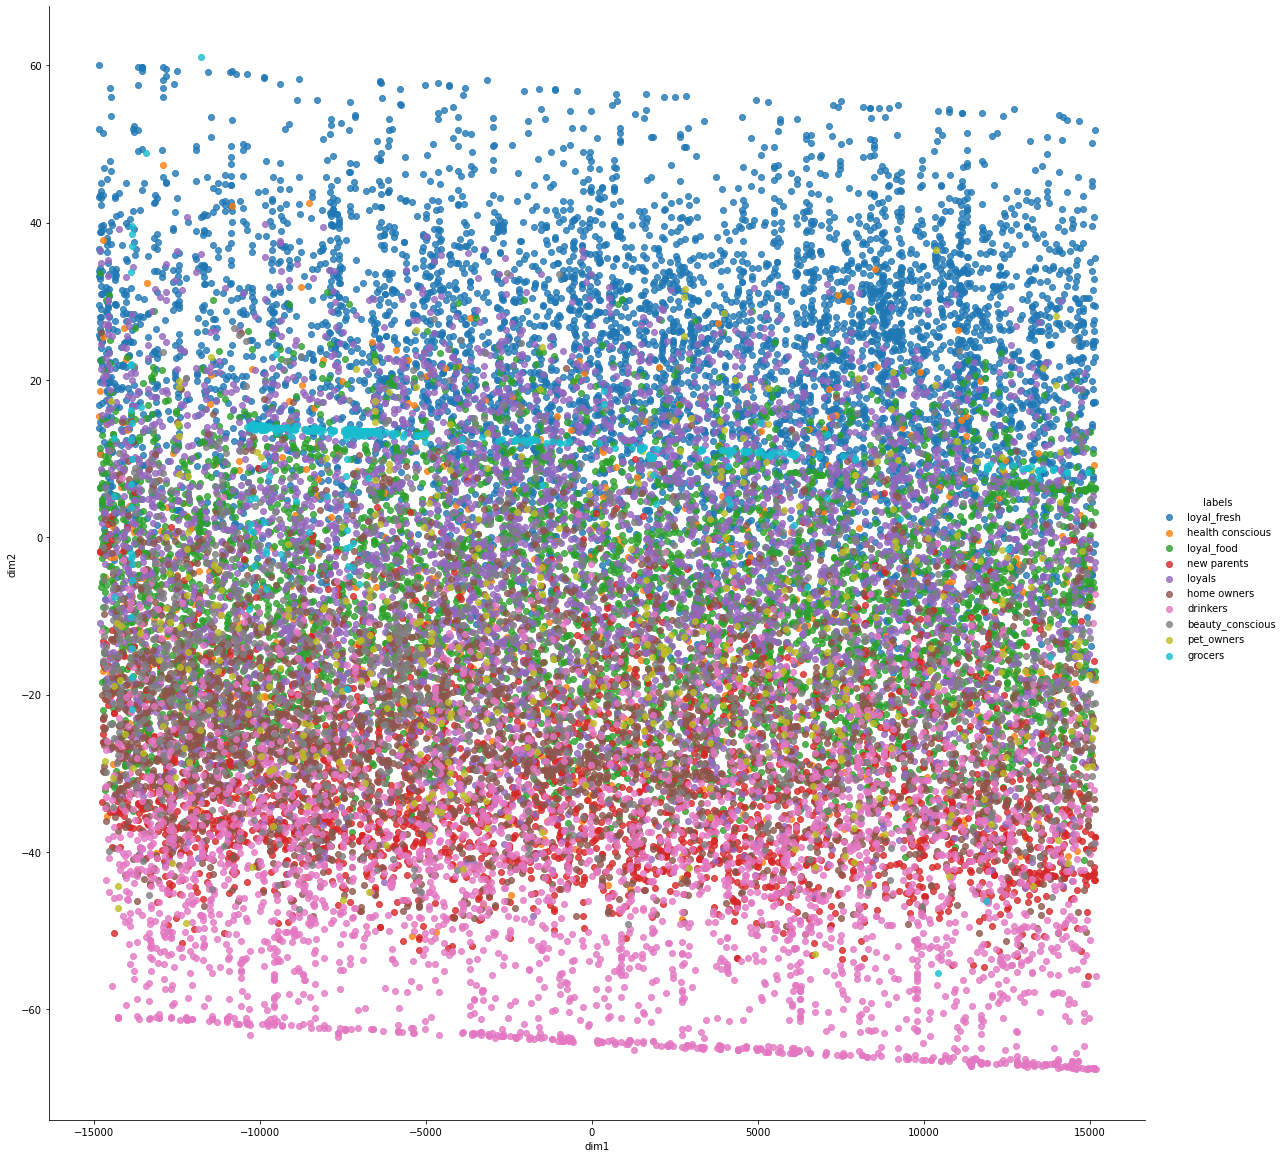

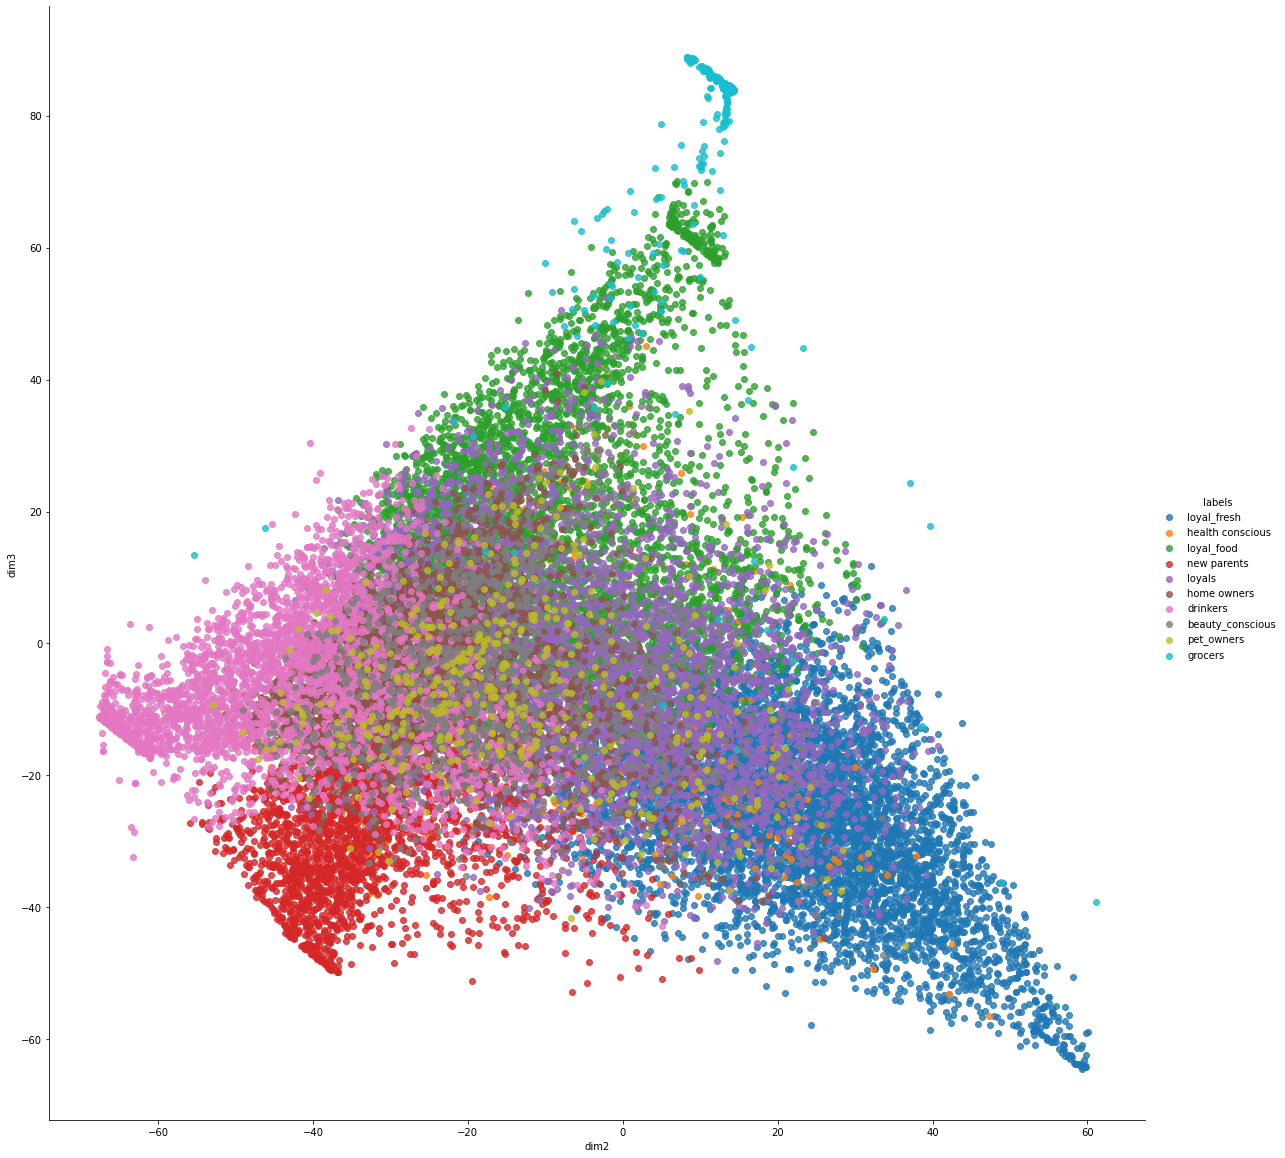

In [63]:
pca_2d_plot_labels(pca, df, frame)

-> From the 2d plot we see that clusters are nicely separated in space.

In [64]:
frame.to_csv('order_segmentation_0.0.csv')

In [65]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
beauty_conscious  1235.0  27.435628  13.480451  8.0  18.0  25.0  33.0  105.0
drinkers          3293.0  24.117218  11.382139  8.0  16.0  22.0  30.0   98.0
grocers            493.0  46.839757  23.380136  8.0  28.0  46.0  63.0  118.0
health conscious   732.0  27.039617  13.731441  8.0  18.0  24.0  33.0  113.0
home owners       2753.0  27.181983  13.456268  8.0  18.0  25.0  33.0  114.0
loyal_food        5144.0  38.228227  18.168000  8.0  26.0  34.0  47.0  113.0
loyal_fresh       6019.0  38.302708  17.629512  8.0  26.0  34.0  47.0  117.0
loyals            4700.0  42.976809  18.722208  8.0  30.0  38.0  52.0  118.0
new parents       2499.0  20.658663  11.154527  8.0  13.0  18.0  26.0  110.0
pet_owners         458.0  27.082969  14.950308  8.0  17.0  24.0  33.0  100.0

-> The variation of total_items with class is not very sound, all classes of orders have similar number of total item counts.

In [66]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%      50%  \
class                                                                      
beauty_conscious  1235.0  11.484721  11.553651  -7.81    3.1250    7.990   
drinkers          3293.0   5.579681   7.843377 -65.15    0.7300    3.530   
grocers            493.0  94.273834  13.393317  42.08  100.0000  100.000   
health conscious   732.0   5.702104   8.281210  -5.54    0.8375    2.875   
home owners       2753.0  12.623062  10.283409 -23.98    4.5500   11.030   
loyal_food        5144.0   5.988488   7.230262 -11.99    1.4500    3.740   
loyal_fresh       6019.0   5.236307   6.589619   0.00    1.0200    3.040   
loyals            4700.0   6.456149   6.838755  -8.07    1.8400    4.370   
new parents       2499.0   8.646735   9.461057 -23.89    1.2400    4.890   
pet_owners         458.0   8.121201   8.951914 -18.06    1.5950    5.595   

                       75%     max  
class                               
beauty_conscious   15.5950   61.86  
drinkers            7.6200   66.14  
grocers           100.0000  100.00  
health conscious    7.0425   52.49  
home owners        18.3600   86.09  
loyal_food          7.7425   52.04  
loyal_fresh         6.8000   65.10  
loyals              8.6100   60.02  
new parents        13.7350   53.29  
pet_owners         12.0200   68.14

-> The customers who have placed orders on grocery have been seen to enjoy a lot of discount, may be there was a stock clearance sale or a promotional sale ulabox.

In [67]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [68]:
frame['class'].value_counts().sort_values(ascending=False)

loyal_fresh         6019
loyal_food          5144
loyals              4700
drinkers            3293
home owners         2753
new parents         2499
beauty_conscious    1235
health conscious     732
grocers              493
pet_owners           458
Name: class, dtype: int64

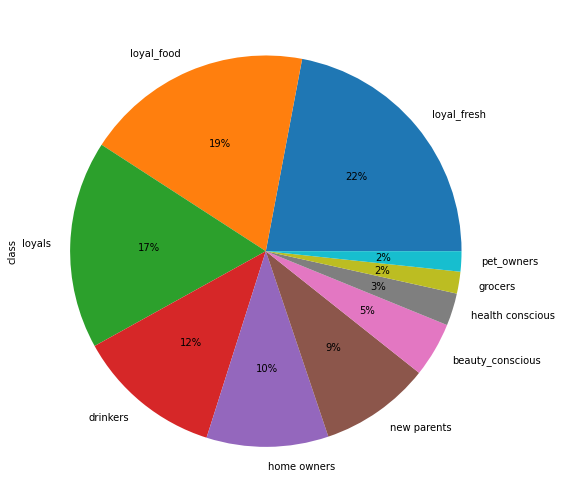

In [69]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

-> Our hypothesised loyal costomers are placed at the top when it comes to number of orders.<br>
-> Our next hypothesis of drink buyers being potential customers is also subtantiated.<br>
-> Pet lovers are very less in number, ulabox should buy less pet products accordingly.<br>
-> When seeing the large discount enjoyed by grocery shoppers in the previous data frame and the less number of grocery shoppers here. They are supposedly customers who brought only on the discount sale.<br>
-> ulabox can actually frame their buying strategies according to these numbers.<br>

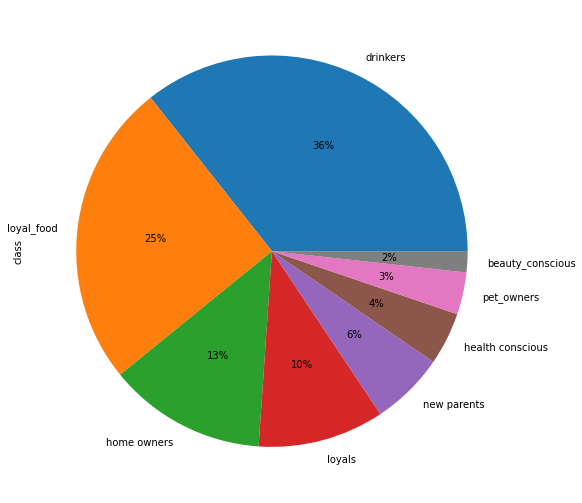

In [70]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [89]:
frame[(frame['discount%']<0).multiply(frame['class']!='drinkers')].describe()

Unnamed: 0  Unnamed: 0.1      customer         order  total_items  \
count     73.000000     73.000000     73.000000     73.000000    73.000000   
mean   14105.328767  14887.835616   4956.808219  14887.835616    33.794521   
std     8580.613373   9107.114763   3041.383981   9107.114763    19.838206   
min     1066.000000   1105.000000    296.000000   1105.000000     9.000000   
25%     5326.000000   5577.000000   1881.000000   5577.000000    18.000000   
50%    14167.000000  14880.000000   4991.000000  14880.000000    29.000000   
75%    22948.000000  24263.000000   8008.000000  24263.000000    44.000000   
max    27891.000000  29734.000000  10113.000000  29734.000000    86.000000   

       discount%    weekday       hour      Food%     Fresh%    Drinks%  \
count  73.000000  73.000000  73.000000  73.000000  73.000000  73.000000   
mean   -4.120685   3.342466  14.027397  27.734658   0.438493  31.917534   
std     4.901736   2.042732   6.398725  21.242492   3.746487  13.825884   
min   -23.980000   1.000000   0.000000   0.000000   0.000000   4.470000   
25%    -5.740000   2.000000  11.000000   7.740000   0.000000  23.070000   
50%    -1.990000   3.000000  14.000000  27.980000   0.000000  30.870000   
75%    -0.770000   4.000000  19.000000  40.100000   0.000000  41.420000   
max    -0.030000   7.000000  23.000000  78.570000  32.010000  63.690000   

           Home%    Beauty%    Health%      Baby%      Pets%     labels  
count  73.000000  73.000000  73.000000  73.000000  73.000000  73.000000  
mean   20.922603   3.746849   2.112466  10.177945   2.949589   5.397260  
std    18.400601   6.889597   6.103481  21.918901  10.604152   2.343666  
min     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  
25%     4.690000   0.000000   0.000000   0.000000   0.000000   3.000000  
50%    20.110000   0.000000   0.000000   0.000000   0.000000   6.000000  
75%    32.140000   5.590000   0.000000   3.590000   0.000000   8.000000  
max    74.670000  37.820000  27.950000  86.000000  67.420000   9.000000

-> From the table we can say, even the people in other clusters who had to pay a negative discount have brought a lot drinks.<br>

In [72]:
frame[frame['discount%']<0].shape[0]

115

-> Only 115 among 30k had to pay an extra charge, that's not a pain killer problem.